# Линейная регрессия: переобучение и регуляризация

В этом задании мы на примерах увидим, как переобучаются линейные модели, разберем, почему так происходит, и выясним, как диагностировать и контролировать переобучение.

Во всех ячейках, где написан комментарий с инструкциями, нужно написать код, выполняющий эти инструкции. Остальные ячейки с кодом (без комментариев) нужно просто выполнить. Кроме того, в задании требуется отвечать на вопросы; ответы нужно вписывать после выделенного слова "__Ответ:__".

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Мы будем работать с датасетом __"bikes_rent.csv"__, в котором по дням записаны календарная информация и погодные условия, характеризующие автоматизированные пункты проката велосипедов, а также число прокатов в этот день. Последнее мы будем предсказывать; таким образом, мы будем решать задачу регрессии.

### Знакомство с данными

## Задание 1

Загрузите датасет с помощью функции __pandas.read_csv__ в переменную __df__. Выведите первые 5 строчек, чтобы убедиться в корректном считывании данных:

In [2]:
path = "bikes_rent.csv"
df = pd.read_csv(path)
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,10.486773,2114
727,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,4.656485,3095
728,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,3.725374,1341
729,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,10.505372,1796


Для каждого дня проката известны следующие признаки:
* _season_: 1 - весна, 2 - лето, 3 - осень, 4 - зима
* _yr_: 0 - 2011, 1 - 2012
* _mnth_: от 1 до 12
* _holiday_: 0 - нет праздника, 1 - есть праздник
* _weekday_: от 0 до 6
* _workingday_: 0 - нерабочий день, 1 - рабочий день
* _weathersit_: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
* _temp_: температура в Цельсиях
* _atemp_: температура по ощущениям в Цельсиях
* _hum_: влажность
* _windspeed(mph)_: скорость ветра в милях в час
* _windspeed(ms)_: скорость ветра в метрах в секунду
* _cnt_: количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)

Итак, у нас есть вещественные, бинарные и номинальные (порядковые) признаки, и со всеми из них можно работать как с вещественными. С номинальныеми признаками тоже можно работать как с вещественными, потому что на них задан порядок. Давайте посмотрим на графиках, как целевой признак зависит от остальных

Постройте графики зависимостей атрибутов от количества поездок. Другими словами вам нужно построить 12 графиков. На каждом должна быть изображена зависимость очередного атрибута от переменной **cnt**.

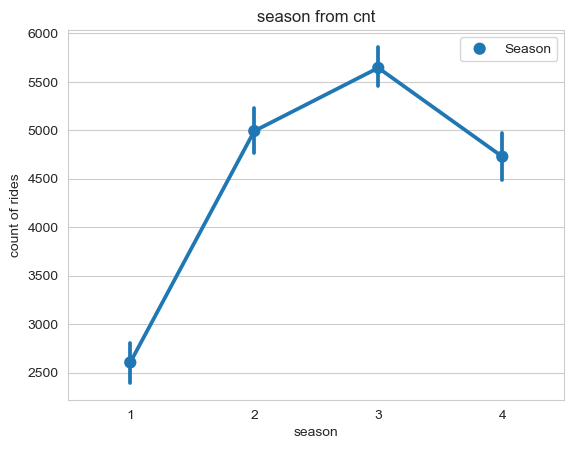

In [3]:
import seaborn as sns


sns.set_style("whitegrid")

# plt.figure(figsize=(10, 6))
# 1
sns.pointplot(x=df["season"], y=df["cnt"], label='Season')
plt.title('season from cnt')
plt.xlabel('season')
plt.ylabel('count of rides')
plt.legend()
plt.show()

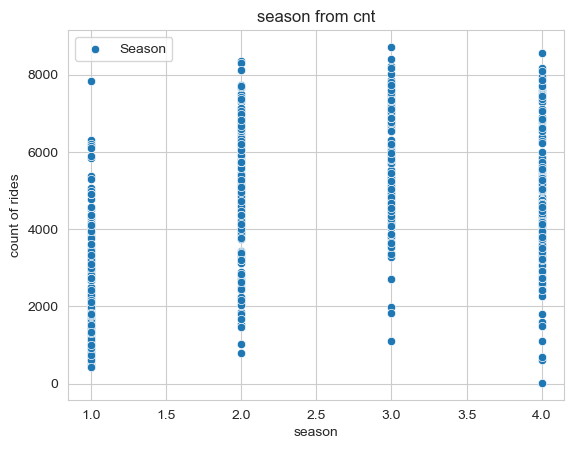

In [4]:
# 1
sns.scatterplot(x=df["season"], y=df["cnt"], label='Season')
plt.title('season from cnt')
plt.xlabel('season')
plt.ylabel('count of rides')
plt.legend()
plt.show()

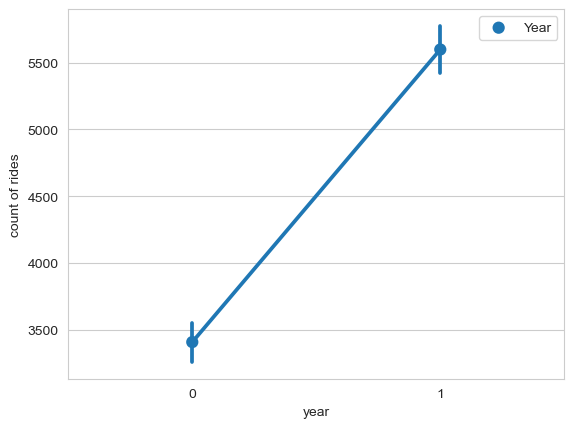

In [176]:
# 2
sns.pointplot(x=df["yr"], y=df["cnt"], label='Year')
plt.xlabel('year')
plt.ylabel('count of rides')
plt.legend()
plt.show()

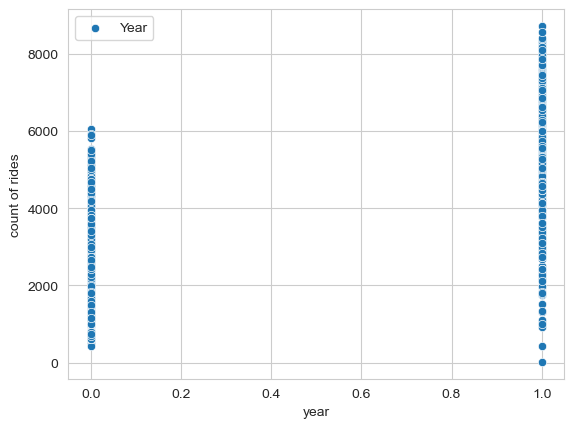

In [177]:
# 2
sns.scatterplot(x=df["yr"], y=df["cnt"], label='Year')
plt.xlabel('year')
plt.ylabel('count of rides')
plt.legend()
plt.show()

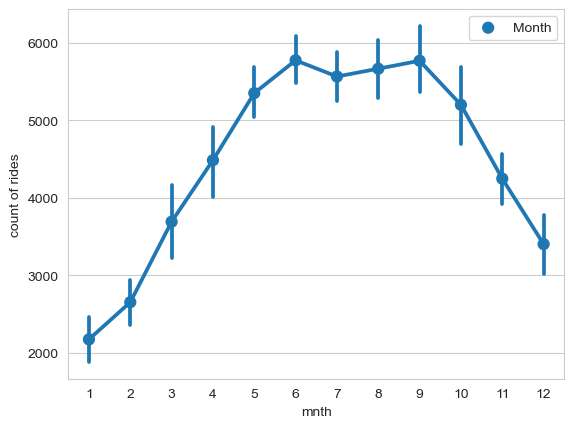

In [178]:
# 3
sns.pointplot(x=df["mnth"], y=df["cnt"], label='Month')
plt.xlabel('mnth')
plt.ylabel('count of rides')
plt.legend()
plt.show()

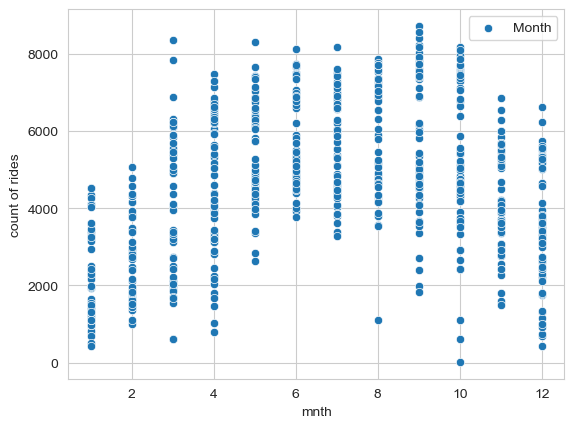

In [179]:
# 3
sns.scatterplot(x=df["mnth"], y=df["cnt"], label='Month')
plt.xlabel('mnth')
plt.ylabel('count of rides')
plt.legend()
plt.show()

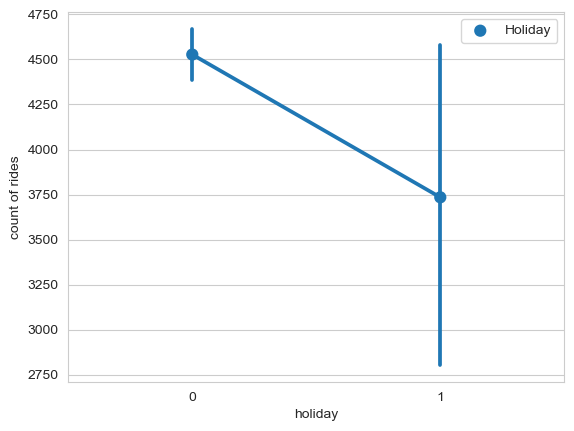

In [180]:
# 4
sns.pointplot(x=df["holiday"], y=df["cnt"], label='Holiday')
plt.xlabel('holiday')
plt.ylabel('count of rides')
plt.legend()
plt.show()

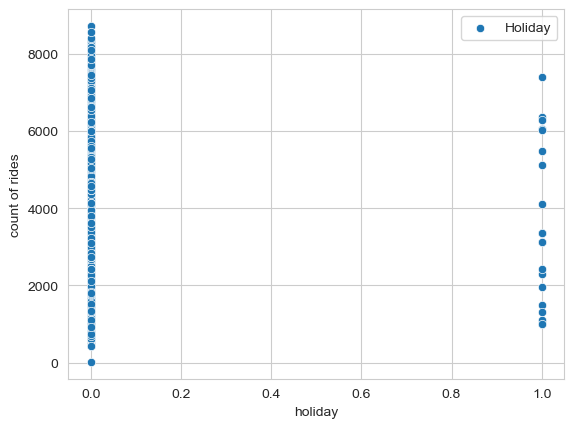

In [181]:
# 4
sns.scatterplot(x=df["holiday"], y=df["cnt"], label='Holiday')
plt.xlabel('holiday')
plt.ylabel('count of rides')
plt.legend()
plt.show()

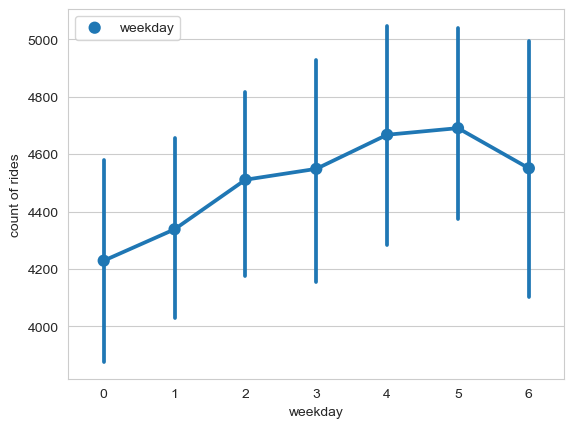

In [182]:
# 5
sns.pointplot(x=df["weekday"], y=df["cnt"], label='weekday')
plt.title('')
plt.xlabel('weekday')
plt.ylabel('count of rides')
plt.legend()
plt.show()

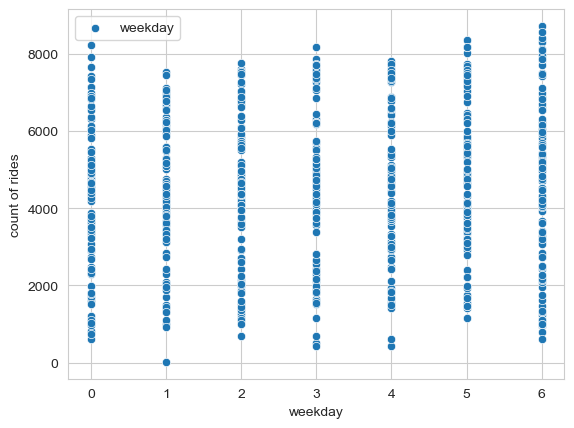

In [183]:
# 5
sns.scatterplot(x=df["weekday"], y=df["cnt"], label='weekday')
plt.xlabel('weekday')
plt.ylabel('count of rides')
plt.legend()
plt.show()

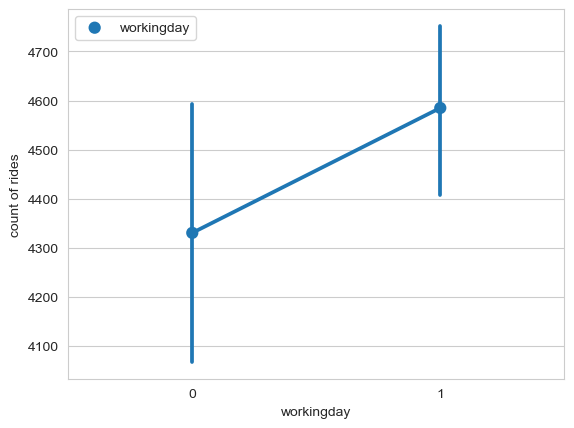

In [184]:
# 6
sns.pointplot(x=df["workingday"], y=df["cnt"], label='workingday')
plt.xlabel('workingday')
plt.ylabel('count of rides')
plt.legend()
plt.show()

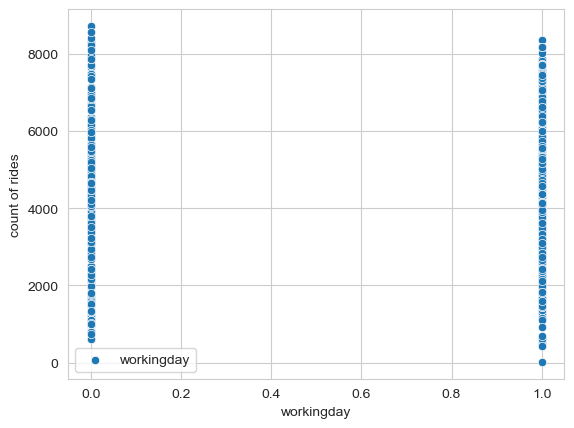

In [185]:
# 6
sns.scatterplot(x=df["workingday"], y=df["cnt"], label='workingday')
plt.xlabel('workingday')
plt.ylabel('count of rides')
plt.legend()
plt.show()

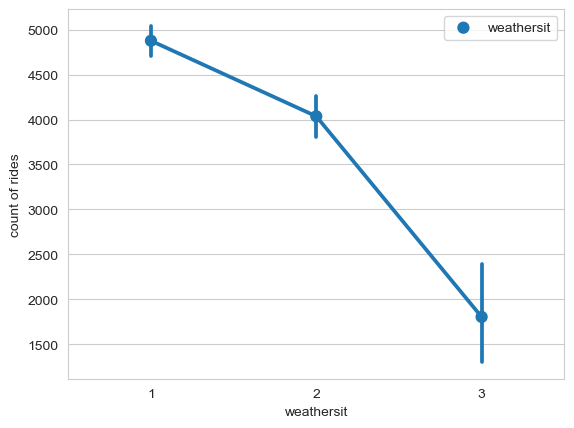

In [186]:
# 7
sns.pointplot(x=df["weathersit"], y=df["cnt"], label='weathersit')
plt.xlabel('weathersit')
plt.ylabel('count of rides')
plt.legend()
plt.show()

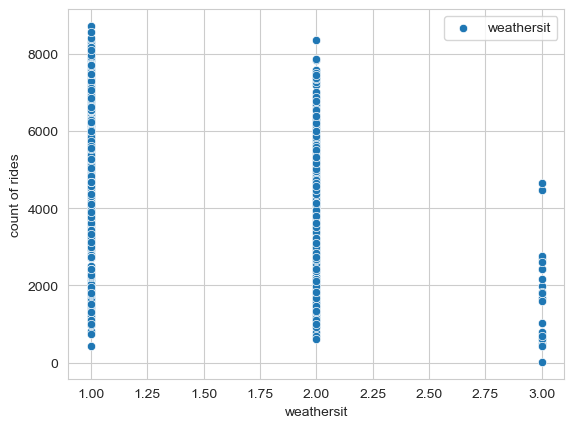

In [187]:
# 7
sns.scatterplot(x=df["weathersit"], y=df["cnt"], label='weathersit')
plt.xlabel('weathersit')
plt.ylabel('count of rides')
plt.legend()
plt.show()

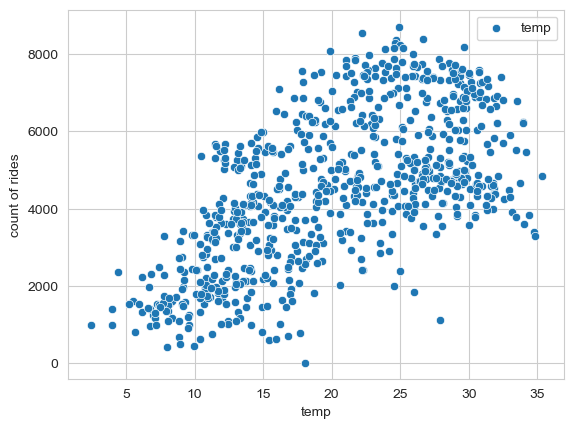

In [188]:
# 8
sns.scatterplot(x=df["temp"], y=df["cnt"], label='temp')
plt.xlabel('temp')
plt.ylabel('count of rides')
plt.legend()
plt.show()

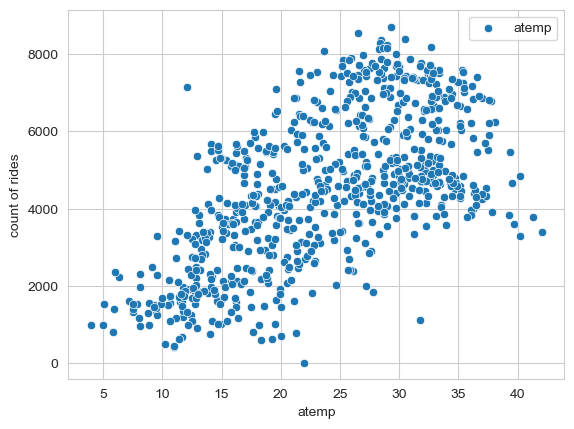

In [189]:
# 9
sns.scatterplot(x=df["atemp"], y=df["cnt"], label='atemp')
plt.xlabel('atemp')
plt.ylabel('count of rides')
plt.legend()
plt.show()

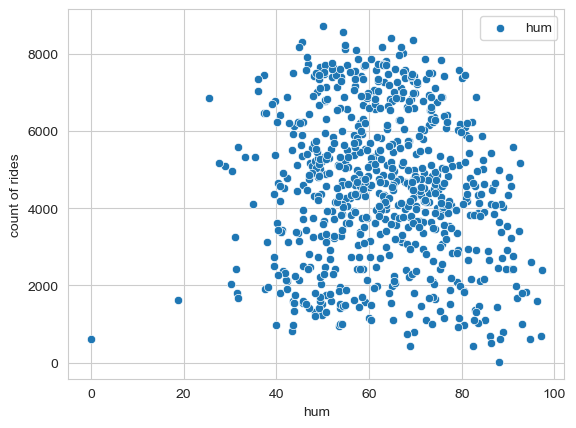

In [190]:
# 10
sns.scatterplot(x=df["hum"], y=df["cnt"], label='hum')
plt.xlabel('hum')
plt.ylabel('count of rides')
plt.legend()
plt.show()

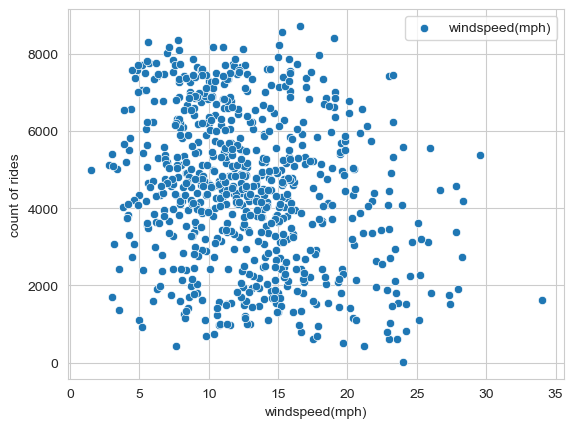

In [191]:
# 11
sns.scatterplot(x=df["windspeed(mph)"], y=df["cnt"], label='windspeed(mph)')
plt.xlabel('windspeed(mph)')
plt.ylabel('count of rides')
plt.legend()
plt.show()

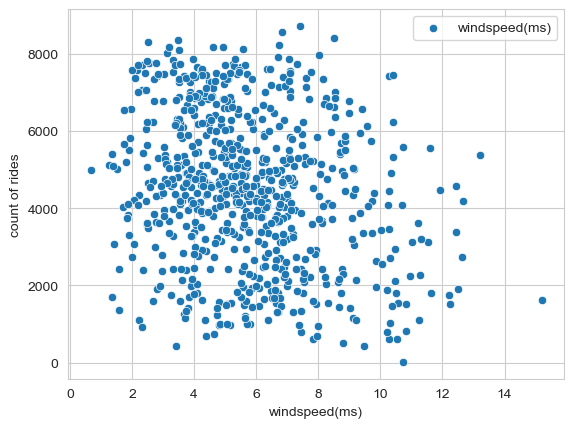

In [192]:
# 12
sns.scatterplot(x=df["windspeed(ms)"], y=df["cnt"], label='windspeed(ms)')
plt.xlabel('windspeed(ms)')
plt.ylabel('count of rides')
plt.legend()
plt.show()

__Вопросы:__
1. Каков характер зависимости числа прокатов от месяца? - Неленійний характер залежності, щось схоже на поліноміальну залежність або синосоідальну (з урахуванням середніх значень кількості прокату за кожний місяць впродовж обраного періоду часу).
1. Укажите один или два признака, от которых число прокатов скорее всего зависит линейно - temp, atemp - чим вище температура ззовні тим більша кількість проката і навпаки
(можливо ще weathersit, holiday, workingday - більш схоже по середнім показаникам, що видно з графіків).

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


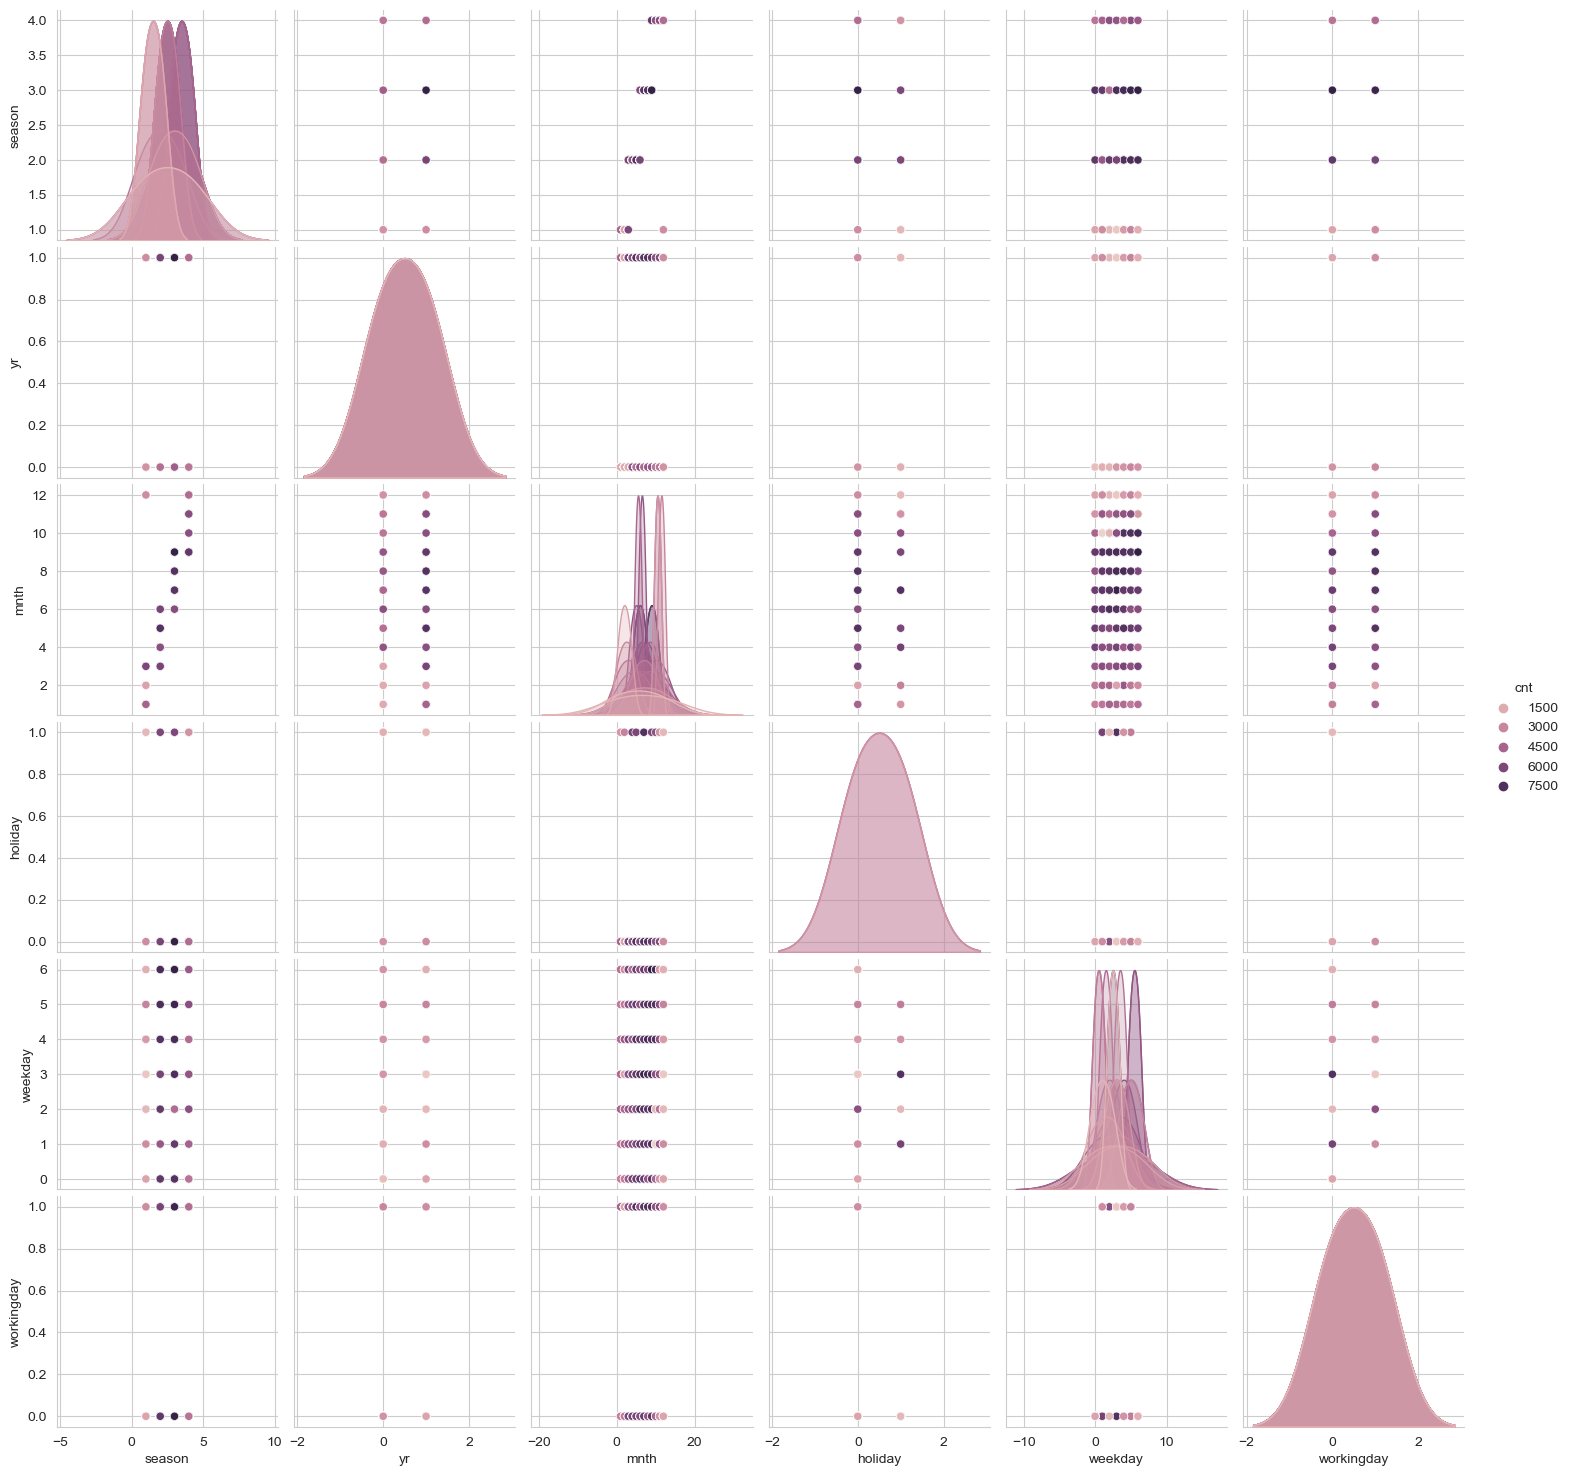

In [22]:
sns.set_style()
sns.pairplot(df,
             vars=["season", "yr", "mnth", "holiday", "weekday", "workingday"],
             hue="cnt")
plt.show()

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


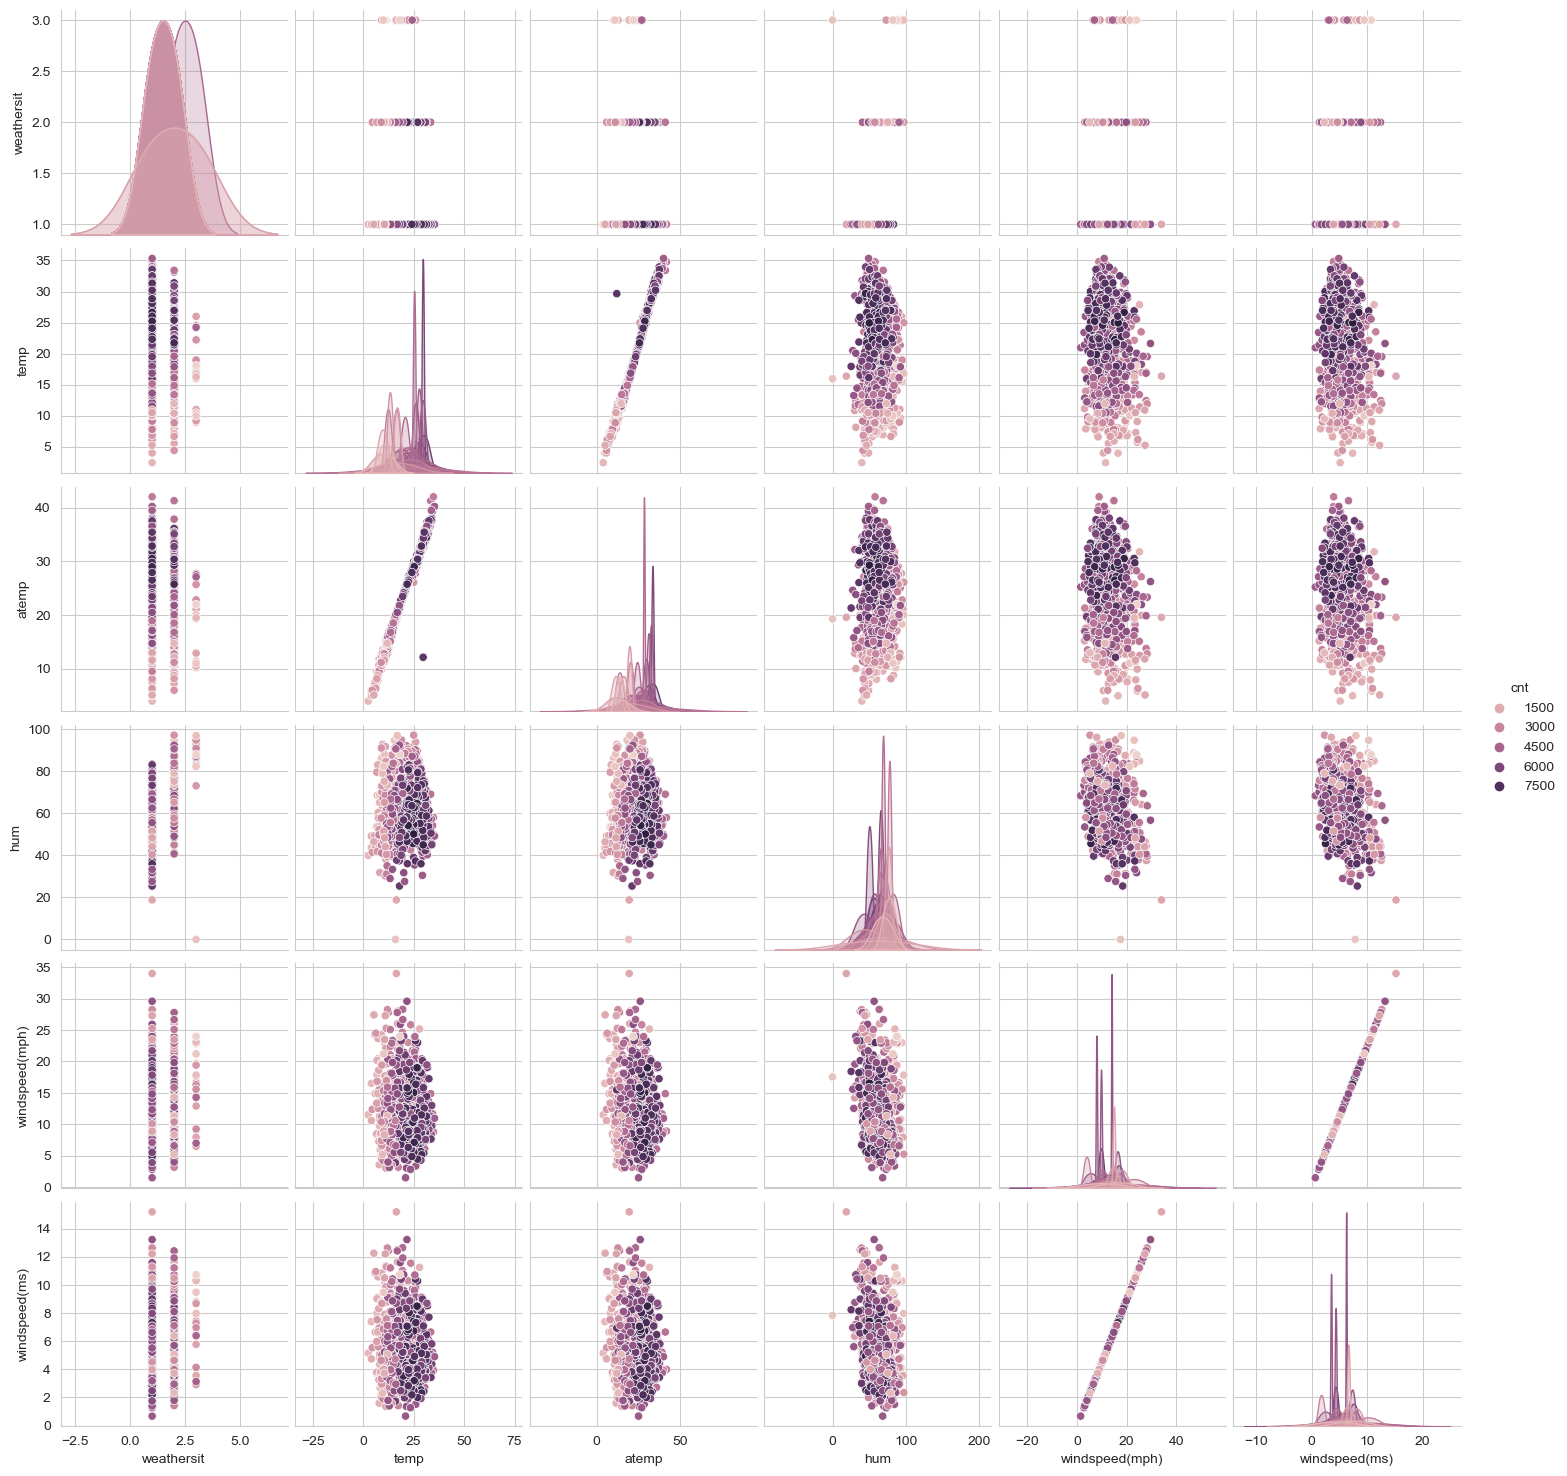

In [23]:
sns.set_style()
sns.pairplot(df,
             vars=["weathersit", "temp", "atemp", "hum", "windspeed(mph)", "windspeed(ms)"],
             hue="cnt")
plt.show()

## Задание 2

Давайте более строго оценим уровень линейной зависимости между признаками и целевой переменной. Хорошей мерой линейной зависимости между двумя векторами является корреляция Пирсона. Нам уже приходилось иметь с ней дело раньше. Для ее вычисления в pandas можно использовать методы датафрейма: corr и corrwith.

Посчитайте корреляции всех признаков, кроме последнего, с последним с помощью метода `corrwith`.

In [24]:
df_count = df["cnt"]

# 1
df_season = pd.DataFrame(df["season"])
df_season.corrwith(df_count)

season    0.4061
dtype: float64

In [25]:
df_corrwith = df[["season"]].corrwith(df["cnt"])
df_corrwith

season    0.4061
dtype: float64

In [26]:
# 2
df_corrwith = df[["yr"]].corrwith(df["cnt"])
df_corrwith

yr    0.56671
dtype: float64

In [27]:
# 3
df_corrwith = df[["mnth"]].corrwith(df["cnt"])
df_corrwith

mnth    0.279977
dtype: float64

In [28]:
# 4
df_corrwith = df[["holiday"]].corrwith(df["cnt"])
df_corrwith

holiday   -0.068348
dtype: float64

In [29]:
# 5
df_corrwith = df[["weekday"]].corrwith(df["cnt"])
df_corrwith

weekday    0.067443
dtype: float64

In [30]:
# 6
df_corrwith = df[["workingday"]].corrwith(df["cnt"])
df_corrwith

workingday    0.061156
dtype: float64

In [31]:
# 7
df_corrwith = df[["weathersit"]].corrwith(df["cnt"])
df_corrwith

weathersit   -0.297391
dtype: float64

In [32]:
# 8
df_corrwith = df[["temp"]].corrwith(df["cnt"])
df_corrwith

temp    0.627494
dtype: float64

In [33]:
# 9
df_corrwith = df[["atemp"]].corrwith(df["cnt"])
df_corrwith

atemp    0.631066
dtype: float64

In [34]:
# 10
df_corrwith = df[["hum"]].corrwith(df["cnt"])
df_corrwith

hum   -0.100659
dtype: float64

In [35]:
# 11
df_corrwith = df[["windspeed(mph)"]].corrwith(df["cnt"])
df_corrwith

windspeed(mph)   -0.234545
dtype: float64

In [36]:
# 12
df_corrwith = df[["windspeed(ms)"]].corrwith(df["cnt"])
df_corrwith

windspeed(ms)   -0.234545
dtype: float64

In [37]:
df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
season,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,-0.229046,0.406100
yr,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,-0.011817,0.566710
mnth,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,-0.207502,0.279977
holiday,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.006292,-0.068348
weekday,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.014282,0.067443
workingday,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.018796,0.061156
weathersit,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,0.039511,-0.297391
temp,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,-0.157944,0.627494
atemp,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,-0.183643,0.631066
hum,0.205445,-0.110651,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.248489,-0.100659


В выборке есть признаки, коррелирующие с целевым, а значит, задачу можно решать линейными методами.

По графикам видно, что некоторые признаки похожи друг на друга. Поэтому давайте также посчитаем корреляции между вещественными признаками.

## Задание 3

Посчитайте попарные корреляции между признаками temp, atemp, hum, windspeed(mph), windspeed(ms) и cnt
с помощью метода corr:

In [38]:
# 1
df["temp"].corr(df_count)

0.6274940090334917

In [39]:
df_corr_t = df[["temp", "cnt"]].corr()
df_corr_t

,temp,cnt
temp,1.000000,0.627494
cnt,0.627494,1.000000


In [40]:
# 2
df["atemp"].corr(df_count)

0.6310656998491813

In [41]:
df_corr_at = df[["atemp", "cnt"]].corr()
df_corr_at

,atemp,cnt
atemp,1.000000,0.631066
cnt,0.631066,1.000000


In [42]:
# 3
df["hum"].corr(df_count)

-0.10065856213715524

In [43]:
df_corr_h = df[["hum", "cnt"]].corr()
df_corr_h

,hum,cnt
hum,1.000000,-0.100659
cnt,-0.100659,1.000000


In [44]:
# 4
df["windspeed(mph)"].corr(df_count)

-0.23454499742167007

In [45]:
df_corr_wmh = df[["windspeed(mph)", "cnt"]].corr()
df_corr_wmh

,windspeed(mph),cnt
windspeed(mph),1.000000,-0.234545
cnt,-0.234545,1.000000


In [46]:
# 5
df["windspeed(ms)"].corr(df_count)

-0.2345449974216893

In [47]:
df_corr_wms = df[["windspeed(ms)", "cnt"]].corr()
df_corr_wms

,windspeed(ms),cnt
windspeed(ms),1.000000,-0.234545
cnt,-0.234545,1.000000


In [193]:
df[['temp','atemp','hum','windspeed(mph)','windspeed(ms)','cnt']].corr()

,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
temp,1.000000,0.991702,0.126963,-0.157944,-0.157944,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,-0.183643,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.248489,-0.100659
windspeed(mph),-0.157944,-0.183643,-0.248489,1.000000,1.000000,-0.234545
windspeed(ms),-0.157944,-0.183643,-0.248489,1.000000,1.000000,-0.234545
cnt,0.627494,0.631066,-0.100659,-0.234545,-0.234545,1.000000


На диагоналях, как и полагается, стоят единицы. Однако в матрице имеются еще две пары сильно коррелирующих столбцов: temp и atemp (коррелируют по своей природе) и два windspeed (потому что это просто перевод одних единиц в другие). Далее мы увидим, что этот факт негативно сказывается на обучении линейной модели.

Напоследок посмотрим средние признаков (метод mean), чтобы оценить масштаб признаков и доли 1 у бинарных признаков.

## Задание 4

Выведите средние признаков

In [194]:
df.mean()

season               2.496580
yr                   0.500684
mnth                 6.519836
holiday              0.028728
weekday              2.997264
workingday           0.683995
weathersit           1.395349
temp                20.310776
atemp               23.717699
hum                 62.789406
windspeed(mph)      12.762576
windspeed(ms)        5.705220
cnt               4504.348837
dtype: float64

Признаки имеют разный масштаб, значит для дальнейшей работы нам лучше нормировать матрицу объекты-признаки.

### Проблема первая: коллинеарные признаки

Итак, в наших данных один признак дублирует другой, и есть еще два очень похожих. Конечно, мы могли бы сразу удалить дубликаты, но давайте посмотрим, как бы происходило обучение модели, если бы мы не заметили эту проблему. 

Для начала проведем масштабирование, или стандартизацию признаков: из каждого признака вычтем его среднее и поделим на стандартное отклонение. Это можно сделать с помощью метода scale.

Кроме того, нужно перемешать выборку, это потребуется для кросс-валидации.

In [105]:
from sklearn.preprocessing import scale
from sklearn.utils import shuffle

In [106]:
df_shuffled = shuffle(df, random_state=42)
X = scale(df_shuffled[df_shuffled.columns[:-1]])
y = df_shuffled["cnt"]

Давайте обучим линейную регрессию на наших данных и посмотрим на веса признаков.

## Задание 5

Создайте объект линейного регрессора, обучите его на всех данных и выведите веса модели (веса хранятся в переменной `coef_` класса регрессора). Можно выводить пары (название признака, вес), воспользовавшись функцией `zip`, встроенной в язык python. Названия признаков хранятся в переменной `df.columns`.


In [107]:
from sklearn.linear_model import LinearRegression

In [108]:
model = LinearRegression()
regressor_task = model.fit(X, y)
for i in range(len(regressor_task.coef_)):
    print(df.columns[i], regressor_task.coef_[i])
print(regressor_task.intercept_)

season 570.8656427502705
yr 1021.9712543517151
mnth -141.3026258557294
holiday -86.75803827032315
weekday 137.22629576365244
workingday 56.39275931025432
weathersit -330.22989265481414
temp 367.461461702284
atemp 585.5673364421491
hum -145.6091071639779
windspeed(mph) 12453872478883.162
windspeed(ms) -12453872479081.625
4504.35452672237


Мы видим, что веса при линейно-зависимых признаках по модулю значительно больше, чем при других признаках. Чтобы понять, почему так произошло, вспомним аналитическую формулу, по которой вычисляются веса линейной модели в методе наименьших квадратов:

$$w = (X^TX)^{-1} X^T y$$

Если в $X$ есть коллинеарные (линейно-зависимые) столбцы, матрица $X^TX$ становится вырожденной, и формула перестает быть корректной. Чем более зависимы признаки, тем меньше определитель этой матрицы и тем хуже аппроксимация $Xw \approx y$. Такая ситуацию называют _проблемой мультиколлинеарности_.

С парой (temp, atemp) чуть менее коррелирующих переменных такого не произошло, однако на практике всегда стоит внимательно следить за коэффициентами при похожих признаках.

Для того, чтобы решить проблему мультиколлинеарности нужно воспользоваться регуляризатором. К оптимизируемому функционалу прибавляют $L_1$ или $L_2$ норму весов, умноженную на коэффициент регуляризации $\alpha$. В первом случае метод называется Lasso, а во втором --- Ridge.

### Задание 6
Давайте попробуем обучить линейные модели с $L_1$ и $L_2$-регуляризацией, а далее сравним их веса. Обучите регрессоры Ridge и Lasso с параметрами по умолчанию и убедитесь, что проблема с весами решилась.

Обучите линейную модель с $L_1$-регуляризацией (класс Lasso) и выведите веса

In [109]:
from sklearn import model_selection, datasets, linear_model, metrics

lasso_regressor = linear_model.Lasso(random_state = 1)
lasso_regressor.fit(X, y)
# lasso_predictions = lasso_regressor.predict(X)
# lasso_predictions

Lasso(random_state=1)

In [110]:
for i in range(len(regressor_task.coef_)):
    print(df.columns[i], lasso_regressor.coef_[i])
lasso_regressor.intercept_

season 560.2416160308866
yr 1019.4634940657191
mnth -128.7306270367876
holiday -86.1527813337109
weekday 137.34789390496329
workingday 55.21237064135682
weathersit -332.3698569623488
temp 376.363236209698
atemp 576.5307935045518
hum -144.12915500348586
windspeed(mph) -197.1396894024843
windspeed(ms) -2.8051518959027654e-08


4504.3488372093025

Обучите линейную модель с $L_2$-регуляризацией (класс Ridge) и выведите веса

In [114]:
ridge_classifier = linear_model.Ridge(random_state=1)
ridge_classifier.fit(X, y)

Ridge(random_state=1)

In [115]:
for i in range(len(ridge_classifier.coef_)):
    print(df.columns[i], ridge_classifier.coef_[i])
ridge_classifier.intercept_

season 563.0645722520155
yr 1018.9483787875276
mnth -131.87332028247522
holiday -86.74609799709285
weekday 138.0051111787188
workingday 55.903110375064145
weathersit -332.34978849907384
temp 386.4578891919604
atemp 566.3470470600145
hum -145.07132729867183
windspeed(mph) -99.25944108184225
windspeed(ms) -99.2594411542917


4504.3488372093025

In [62]:
"""season: 563.064572252
yr: 1018.94837879
mnth: -131.873320282
holiday: -86.7460979971
weekday: 138.005111179
workingday: 55.9031103751
weathersit: -332.349788499
temp: 386.457889192
atemp: 566.34704706
hum: -145.071327299
windspeed(mph): -99.2594410818
windspeed(ms): -99.2594411544"""

'season: 563.064572252\nyr: 1018.94837879\nmnth: -131.873320282\nholiday: -86.7460979971\nweekday: 138.005111179\nworkingday: 55.9031103751\nweathersit: -332.349788499\ntemp: 386.457889192\natemp: 566.34704706\nhum: -145.071327299\nwindspeed(mph): -99.2594410818\nwindspeed(ms): -99.2594411544'

### Задание 7

В отличие от $L_2$-регуляризации, $L_1$ обнуляет веса при некоторых признаках Давайте пронаблюдаем, как меняются веса при увеличении коэффициента регуляризации $\alpha$.

Для каждого значения коэффициента из `alphas` обучите регрессор `Lasso` и запишите веса список `coefs_lasso`, а затем обучите `Ridge` и запишите веса в список`coefs_ridge`. Конвертируйте полученные списки в `np.array`.

In [116]:
alphas = np.arange(1, 500, 50)

coefs_lasso = []

for alpha in alphas:
    print(alpha)
    lasso_regressor = linear_model.Lasso(alpha=alpha)
    lasso_regressor.fit(X, y)
    coefs_lasso.append(lasso_regressor.coef_)

coefs_lasso = np.array(coefs_lasso)
coefs_lasso

1
51
101
151
201
251
301
351
401
451


array([[ 5.60241616e+02,  1.01946349e+03, -1.28730627e+02,
        -8.61527813e+01,  1.37347894e+02,  5.52123706e+01,
        -3.32369857e+02,  3.76363236e+02,  5.76530794e+02,
        -1.44129155e+02, -1.97139689e+02, -2.80515190e-08],
       [ 4.10969632e+02,  9.77019409e+02, -0.00000000e+00,
        -5.34489688e+01,  9.19434374e+01,  1.75372118e+01,
        -3.18125568e+02,  3.22829934e+02,  6.10031512e+02,
        -9.10689615e+01, -1.45066095e+02, -2.29885523e-08],
       [ 3.70077089e+02,  9.35945490e+02,  0.00000000e+00,
        -1.21619360e+01,  4.88886342e+01,  0.00000000e+00,
        -3.08805664e+02,  2.69417263e+02,  6.32502623e+02,
        -2.75042876e+01, -9.37749037e+01, -2.41644207e-08],
       [ 3.32835717e+02,  8.91870058e+02,  0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -2.79616688e+02,  2.11052030e+02,  6.62920880e+02,
        -0.00000000e+00, -5.01551472e+01, -2.62788478e-08],
       [ 2.98134448e+02,  8.45652857e+02,  0.0000000

In [117]:
coefs_ridge = []

for alpha in alphas:
    print(alpha)
    ridge_classifier = linear_model.Ridge(alpha=alpha)
    ridge_classifier.fit(X, y)
    coefs_ridge.append(ridge_classifier.coef_)
    
coefs_ridge = np.array(coefs_ridge)
coefs_ridge

1
51
101
151
201
251
301
351
401
451


array([[ 563.06457225, 1018.94837879, -131.87332028,  -86.746098  ,
         138.00511118,   55.90311038, -332.3497885 ,  386.45788919,
         566.34704706, -145.0713273 ,  -99.25944108,  -99.25944115],
       [ 461.1786324 ,  954.30774189,  -41.56545001,  -84.91347027,
         126.60366663,   54.2516911 , -313.27515141,  458.90147709,
         481.44350031, -151.29101033, -101.62731482, -101.62731483],
       [ 403.97653045,  898.08362212,    5.67424346,  -81.91106159,
         117.94141144,   52.72848389, -298.40898086,  455.28986839,
         467.43141748, -152.68605059, -102.10167084, -102.10167084],
       [ 366.60423851,  848.46346471,   34.02728278,  -78.77196479,
         110.68012006,   51.25719208, -286.12515935,  447.47982533,
         455.75402966, -151.48320603, -102.00537592, -102.00537593],
       [ 339.74528956,  804.25104797,   52.48987295,  -75.71740756,
         104.40346414,   49.84189502, -275.48609488,  438.50968939,
         444.7642744 , -148.94396978, -101.5

Проанализируйте динамику весов при увеличении параметра регуляризации:

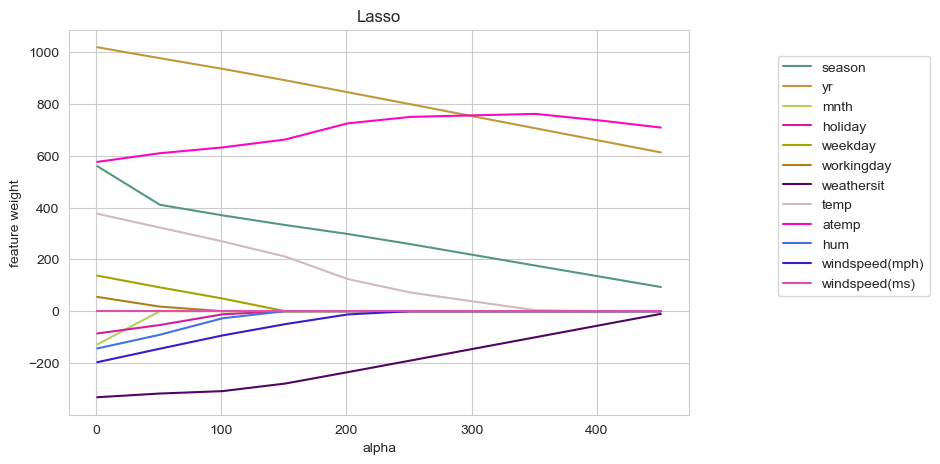

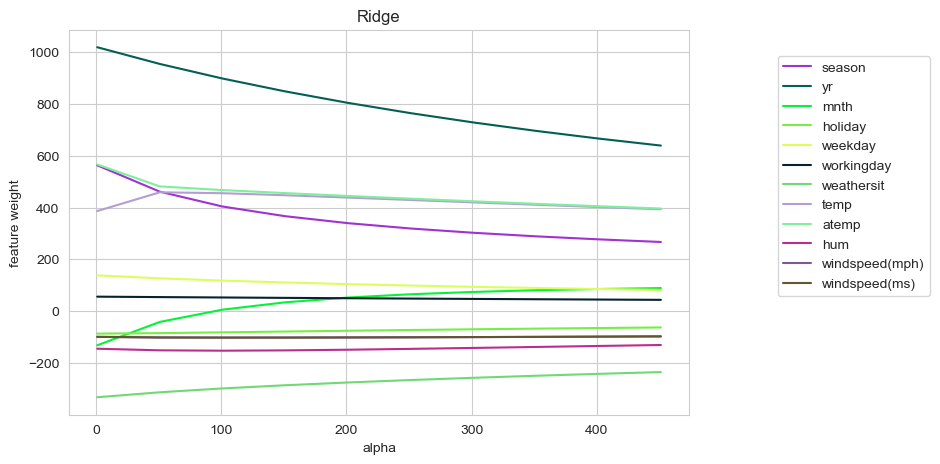

In [118]:
plt.figure(figsize=(8, 5))

for coef, feature in zip(coefs_lasso.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

plt.show()

Проанализируйте графики и дайте ответы на следующие вопросы.

1. Какой регуляризатор (Ridge или Lasso) агрессивнее уменьшает веса при одном и том же alpha?
1. Что произойдет с весами Lasso, если alpha сделать очень большим? Поясните, почему так происходит.
1. Можно ли утверждать, что `Lasso` исключает один из признаков `windspeed` при любом значении `alpha > 0`? А Ridge? Считается, что регуляризатор исключает признак, если коэффициент при нем меньше $10^{-3}$.
1. Какой из регуляризаторов подойдет для отбора неинформативных признаков?

In [ ]:
# Какой регуляризатор (Ridge или Lasso) агрессивнее уменьшает веса при одном и том же alpha?
# lasso

In [ ]:
# Что произойдет с весами Lasso, если alpha сделать очень большим? Поясните, почему так происходит.
# Вони будуть зменшуватися, що видно з результатів, і будуть прагнути до нуля.
# Коефіцієнт регуляризації визначає складність моделі. При його великому значенні виявляється, що оптимально залишити константну модель - залишити вільний член (тобто обнулити решту коєфіціентів).

In [ ]:
# Можно ли утверждать, что Lasso исключает один из признаков windspeed при любом значении alpha > 0? А Ridge? Считается, что регуляризатор исключает признак, если коэффициент при нем меньше  10−3
# Так Lasso - виключає. Ridge ні, ваги стають рівними.

In [ ]:
# Какой из регуляризаторов подойдет для отбора неинформативных признаков?
# Lasso

### Задание 8

Далее будем работать с `Lasso`.

Итак, мы видим, что при изменении alpha модель по-разному подбирает коэффициенты признаков. Нам нужно выбрать наилучшее alpha.

Для этого, во-первых, нам нужна метрика качества. Будем использовать в качестве метрики сам оптимизируемый функционал метода наименьших квадратов, то есть `Mean Square Error`.

Во-вторых, нужно понять, на каких данных эту метрику считать. Нельзя выбирать `alpha` по значению MSE на обучающей выборке, потому что тогда мы не сможем оценить, как модель будет делать предсказания на новых для нее данных. Если мы выберем одно разбиение выборки на обучающую и тестовую (это называется holdout), то настроимся на конкретные "новые" данные, и вновь можем переобучиться. Поэтому будем делать несколько разбиений выборки, на каждом пробовать разные значения alpha, а затем усреднять MSE. Удобнее всего делать такие разбиения кросс-валидацией, то есть разделить выборку на $K$ часте, и каждый раз брать одну из них как тестовую, а из оставшихся блоков составлять обучающую выборку. 

Делать кросс-валидацию для регрессии в sklearn совсем просто: для этого есть специальный регрессор, __LassoCV__, который берет на вход список из alpha и для каждого из них вычисляет MSE на кросс-валидации. После обучения (если оставить параметр cv=3 по умолчанию) регрессор будет содержать переменную __mse\_path\___, матрицу размера len(alpha) x k, k = 3 (число блоков в кросс-валидации), содержащую значения MSE на тесте для соответствующих запусков. Кроме того, в переменной alpha\_ будет храниться выбранное значение параметра регуляризации, а в coef\_, традиционно, обученные веса, соответствующие этому alpha_.

Обратите внимание, что регрессор может менять порядок, в котором он проходит по alphas; для сопоставления с матрицей MSE лучше использовать переменную регрессора alphas_.

Обучите регрессор `LassoCV` на всех параметрах регуляризации из alpha. Постройте график _усредненного_ по строкам `MSE` в зависимости от `alpha` (используйте для этого функцию `create_plot`).

Выведите выбранное `alpha`, а также пары "признак-коэффициент" для обученного вектора коэффициентов.

In [142]:
def create_plot(data, title, xlabel, ylabel, figsize=None):
    size = figsize or (15, 5)
    plt.figure(figsize=size)

    x = data[0]
    y = data[1]
    plt.plot(x, y)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.grid()
    plt.show()

In [135]:
from sklearn.linear_model import LassoCV

alphas = np.arange(1, 100, 5)
# Розділення виборки на к=5 блоків!!!
regressor = LassoCV(cv=5, n_alphas=20, alphas=alphas).fit(X, y)
regressor.coef_

array([ 5.60241616e+02,  1.01946349e+03, -1.28730627e+02, -8.61527813e+01,
        1.37347894e+02,  5.52123706e+01, -3.32369857e+02,  3.76363236e+02,
        5.76530794e+02, -1.44129155e+02, -1.97139689e+02, -2.80515190e-08])

In [136]:
regressor.alpha_

1

In [138]:
regressor.alphas_

array([96, 91, 86, 81, 76, 71, 66, 61, 56, 51, 46, 41, 36, 31, 26, 21, 16,
       11,  6,  1])

In [143]:
d = regressor.mse_path_.mean(axis=1)
print(regressor.mse_path_)
# print(d)
data = [regressor.alphas_, d]
data

[[803606.60244077 909516.81949203 856983.69774481 893284.70153213
  784856.83658029]
 [796118.34203084 905847.38528818 847078.75192492 889243.93579895
  780167.40645665]
 [788045.85818471 902497.93487377 837555.0977051  885455.05581608
  775858.2870176 ]
 [779824.91128332 899469.63800281 828407.82601459 881730.9841346
  771928.33698789]
 [771981.53426992 896762.48693175 819636.72631023 878240.04022018
  768378.53482014]
 [764512.76340344 894376.4816275  811237.79667747 875060.04899287
  764915.86877383]
 [757421.54706449 892311.6220899  803218.86796374 872190.97810625
  761698.62981857]
 [750709.81352605 890567.90831897 795199.15309697 869632.80112017
  758904.02411889]
 [744376.99051045 889145.3403147  787361.30180859 867385.49505681
  756531.9920458 ]
 [738422.95018564 888043.91807709 779913.59796298 865449.03994156
  754582.48396176]
 [732847.70054563 887263.64160614 772856.08146949 863823.41841332
  753055.46405061]
 [727651.24685303 886804.51090185 766188.71807727 862508.61538506


[array([96, 91, 86, 81, 76, 71, 66, 61, 56, 51, 46, 41, 36, 31, 26, 21, 16,
        11,  6,  1]),
 array([849649.73155801, 843691.16429991, 837882.44671945, 832272.33928464,
        826999.86451045, 822020.59189502, 817368.32900859, 813002.74003621,
        808960.22394727, 805282.39802581, 801969.26121704, 799020.79953995,
        796437.0012671 , 794213.32623068, 792107.50817215, 790123.42637334,
        787952.51271484, 785590.79391005, 783123.8359058 , 783011.38118895])]

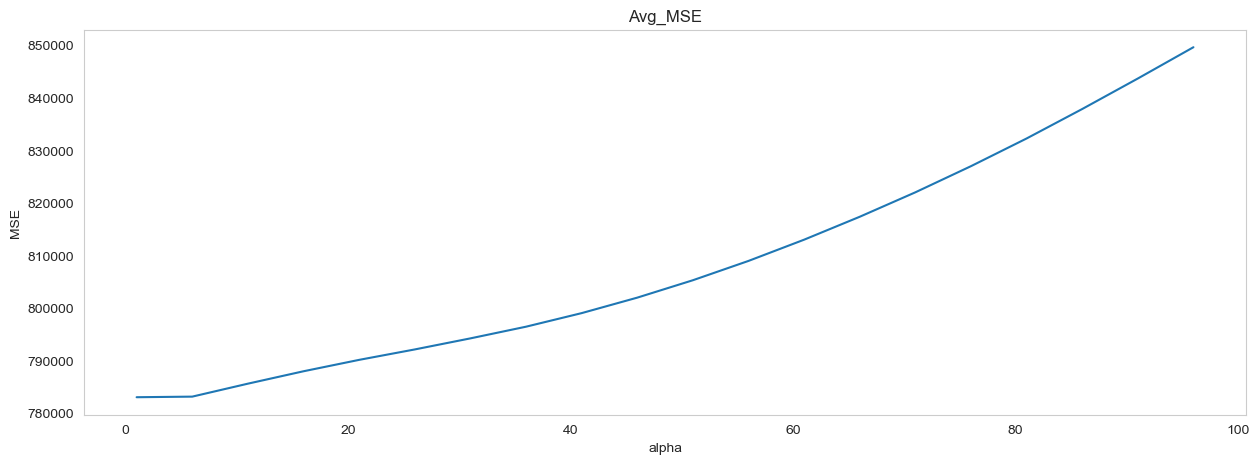

Alpha is 1

season: 560.2416160308866
yr: 1019.4634940657191
mnth: -128.7306270367876
holiday: -86.1527813337109
weekday: 137.34789390496329
workingday: 55.21237064135682
weathersit: -332.3698569623488
temp: 376.363236209698
atemp: 576.5307935045518
hum: -144.12915500348586
windspeed(mph): -197.1396894024843
windspeed(ms): -2.8051518959027654e-08


In [146]:
create_plot(data, "Avg_MSE", "alpha", "MSE")

print(f"Alpha is {regressor.alpha_}\n")
for i in range(len(regressor.coef_)):
    print(f"{df.columns[i]}: {regressor.coef_[i]}")

In [199]:
# Розділення виборки на к=3 блоків!!!
regressor = LassoCV(cv=3, n_alphas=20, alphas=alphas).fit(X, y)
print(regressor.coef_, "\n")
print(regressor.alpha_)


"""Alpha = 6

season: 532.018982841
yr: 1015.06022264
mnth: -100.039526144
holiday: -83.2939598753
weekday: 132.504465491
workingday: 51.5570856141
weathersit: -330.55985674
temp: 370.67985503
atemp: 581.396931065
hum: -140.007405501
windspeed(mph): -191.771408471
windspeed(ms): -2.68545418157e-08"""


[ 5.32018983e+02  1.01506022e+03 -1.00039526e+02 -8.32939599e+01
  1.32504465e+02  5.15570856e+01 -3.30559857e+02  3.70679855e+02
  5.81396931e+02 -1.40007406e+02 -1.91771408e+02 -2.68563123e-08] 

6


'Alpha = 6\n\nseason: 532.018982841\nyr: 1015.06022264\nmnth: -100.039526144\nholiday: -83.2939598753\nweekday: 132.504465491\nworkingday: 51.5570856141\nweathersit: -330.55985674\ntemp: 370.67985503\natemp: 581.396931065\nhum: -140.007405501\nwindspeed(mph): -191.771408471\nwindspeed(ms): -2.68545418157e-08'

Итак, мы выбрали некоторый параметр регуляризации. Давайте посмотрим, какие бы мы выбирали alpha, если бы делили выборку только один раз на обучающую и тестовую, то есть рассмотрим траектории MSE, соответствующие отдельным блокам выборки.

### Задание 9

Выведите значения `alpha`, соответствующие минимумам `MSE` на каждом разбиении (то есть по столбцам).
На трех отдельных графиках визуализируйте столбцы `mse_path_`.


Alphas with minimum MSE:
Alpha = 1, MSE = 691447.2507878075


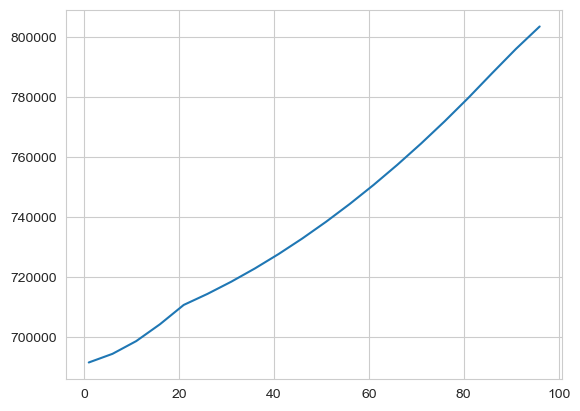

Alpha = 11, MSE = 883471.182942538


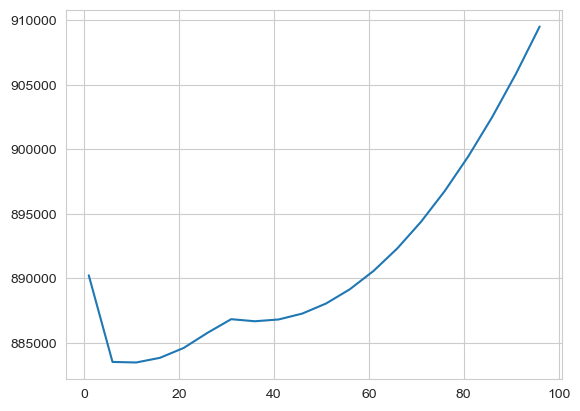

Alpha = 1, MSE = 710110.1624117345


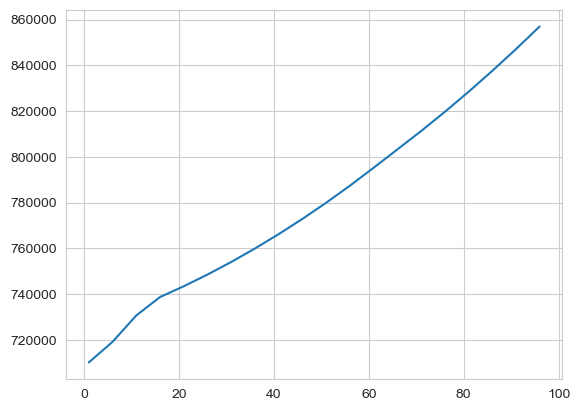

Alpha = 26, MSE = 860737.4059488719


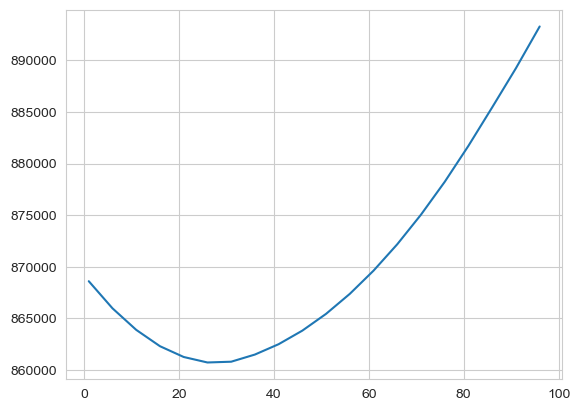

Alpha = 21, MSE = 750676.3567790004


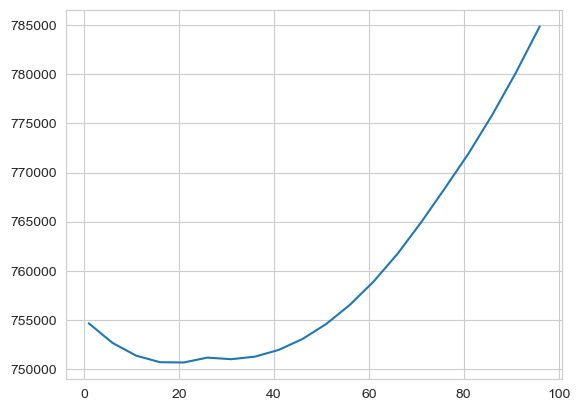

In [174]:
data = pd.DataFrame(regressor.mse_path_, index = regressor.alphas_, columns=[1, 2, 3, 4, 5])
print("Alphas with minimum MSE:")

for i in data.columns:
    min_val = data[i].min()
    alpha_val = data[data[i] == min_val].index[0]
    print(f"Alpha = {alpha_val}, MSE = {min_val}")
    plt.plot(data[i])
    plt.show()

На каждом разбиении оптимальное значение `alpha` свое, и ему соответствует большое MSE на других разбиениях. Получается, что мы настраиваемся на конкретные обучающие и контрольные выборки. При выборе `alpha` на кросс-валидации мы выбираем нечто "среднее", что будет давать приемлемое значение метрики на разных разбиениях выборки. 

### Задание 10

Наконец, как принято в анализе данных, давайте проинтерпретируем результат. Ответьте на следующие вопросы.

#### Вопрос 1

В последней обученной модели выберите 4 признака с наибольшими (положительными) коэфициентами (и выпишите их), посмотрите на визуализации зависимостей `cnt` от этих признаков, которые мы рисовали в блоке "Знакомство с данными". Видна ли возрастающая линейная зависимость `cnt` от этих признаков по графикам? Логично ли утверждать (из здравого смысла), что чем больше значение этих признаков, тем больше людей захотят взять велосипеды? 

__Ответ:__

In [11]:
# season: 560.2416160308866, yr: 1019.4634940657191, temp: 376.363236209698, atemp: 576.5307935045518
# Так, лінійна залежність простежується. 
# Не дуже логічно стверджувати, що при збільшенні значення року (подальші роки роботи сервісу прокату велосипедів) більше людей будуть брати велосипеди.
# А зі збільшенням температури - логічно (за це я писав вишче), хоча за дуже високої температури ніхто не прийде за велосипедами.

#### Вопрос 2

Выберите 3 признака с наибольшими по модулю отрицательными коэффициентами (и выпишите их), посмотрите на соответствующие визуализации. Видна ли убывающая линейная зависимость? Логично ли утверждать, что чем больше величина этих признаков, тем меньше людей захотят взять велосипеды?

__Ответ:__

In [12]:
# weathersit: -332.3698569623488, hum: -144.12915500348586, windspeed(mph): -197.1396894024843
# Так, спадна залежність простежується. Логічно для всіх ознак - чим вишче значення, тим менше людей.

#### Вопрос 3

Выпишите признаки с коэффициентами, близкими к нулю (< 1e-3). Как вы думаете, почему модель исключила их из модели (вновь посмотрите на графики)? Верно ли, что они никак не влияют на спрос на велосипеды?

__Ответ:__

In [13]:
# windspeed(ms): -2.8051518959027654e-08
# Тому що ця ознака дуюлює ознаку windspeed(mph) тільки у іншій системі вимірювання. Саме ознака windspeed(mph) має вплив
# на попит велосіпедів (і це було розібрано вишче).

### Заключение
Итак, мы посмотрели, как можно следить за адекватностью линейной модели, как отбирать признаки и как грамотно, по возможности не настраиваясь на какую-то конкретную порцию данных, подбирать коэффициент регуляризации. 

Стоит отметить, что с помощью кросс-валидации удобно подбирать лишь небольшое число параметров (1, 2, максимум 3), потому что для каждой допустимой их комбинации нам приходится несколько раз обучать модель. Такой процесс занимает много времени, особенно если нужно обучаться на больших объемах данных.